# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\tarai\OneDrive\Documents\Rohan\05-Challenge\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"C:\Users\tarai\OneDrive\Documents\Rohan\05-Challenge\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table 
print(combined_data.head())



  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [14]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

print("Duplicate mice based on Mouse ID and Timepoint:")
print(duplicate_mice_ids)

Duplicate mice based on Mouse ID and Timepoint:
['g989']


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = "g989" 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == duplicate_mouse_id]

# Display the data for the duplicate mouse ID
print("Data for the duplicate mouse ID:")
print(duplicate_mouse_data)

Data for the duplicate mouse ID:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Fema

In [22]:

cleaned_data = combined_data[combined_data["Mouse ID"] != duplicate_mouse_id]

print("Cleaned DataFrame:")
print(cleaned_data)

Cleaned DataFrame:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898              

In [23]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(cleaned_data["Mouse ID"].unique())
print(f"Number of mice in the clean DataFrame: {num_mice_cleaned}")


Number of mice in the clean DataFrame: 248


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by drug regimen

grouped_data = cleaned_data.groupby("Drug Regimen")

mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = grouped_data["Tumor Volume (mm3)"].var()
std_dev_tumor_volume = grouped_data["Tumor Volume (mm3)"].std()
sem_tumor_volume = grouped_data["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
    "Mean": mean_tumor_volume,
    "Median": median_tumor_volume,
    "Variance": variance_tumor_volume,
    "Standard Deviation": std_dev_tumor_volume,
    "SEM": sem_tumor_volume
})

print("Summary Statistics of Tumor Volume by Drug Regimen:")
print(summary_df)

Summary Statistics of Tumor Volume by Drug Regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

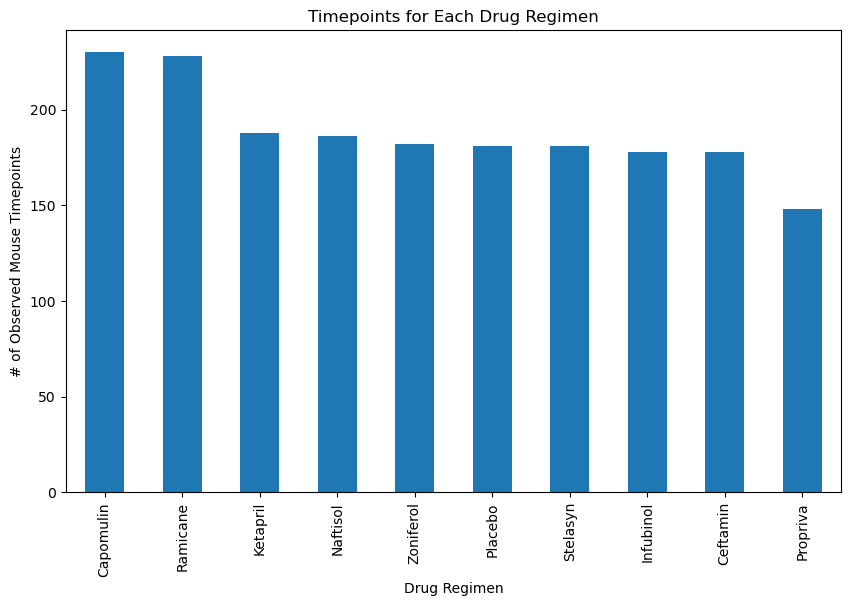

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_data["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

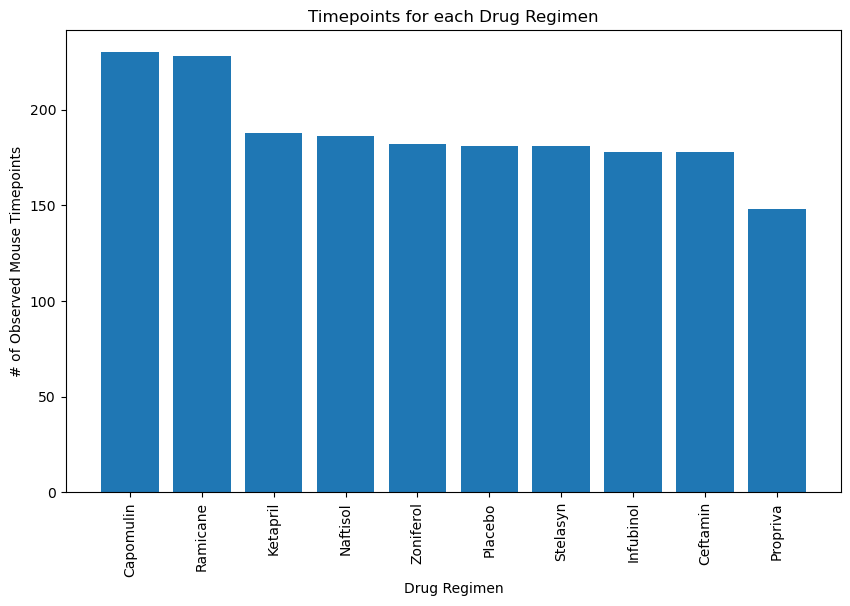

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

regimen_counts = cleaned_data["Drug Regimen"].value_counts()

x = regimen_counts.index
y = regimen_counts.values

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.title("Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

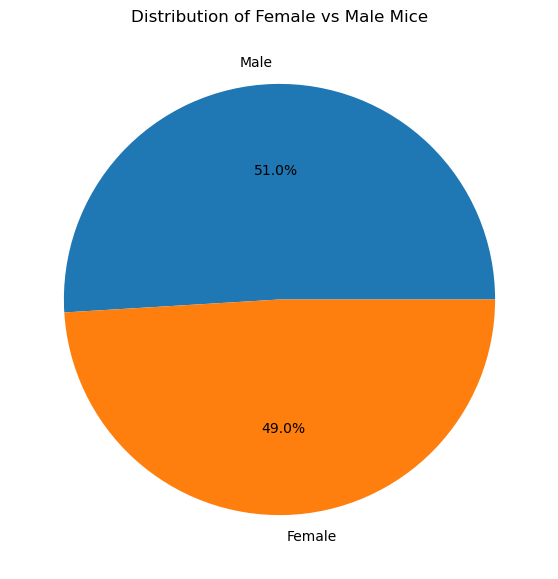

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data["Sex"].value_counts()
gender_counts.plot(kind="pie", figsize=(7, 7), autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")
plt.show()

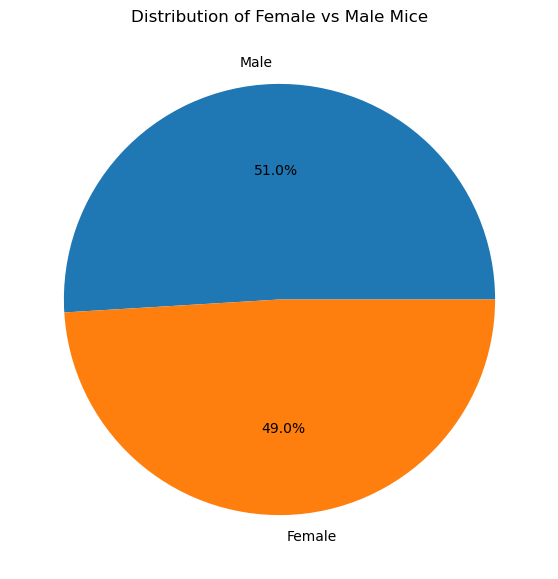

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data["Sex"].value_counts()
gender_counts.plot(kind="pie", figsize=(7, 7), autopct="%1.1f%%")
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df = max_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint_df, cleaned_data, on=["Mouse ID", "Timepoint"])

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = final_tumor_volume[final_tumor_volume["Drug Regimen"].isin(treatment_regimens)]



In [41]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Add the subset 
    tumor_vol_data.append(treatment_data)
    
    # Calculate and print the IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    print(f"IQR for {treatment}: {iqr}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers for {treatment}: {outliers}\n")


IQR for Capomulin: 7.781863460000004
Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)

IQR for Ramicane: 9.098536719999998
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)

IQR for Infubinol: 11.477135160000003
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

IQR for Ceftamin: 15.577752179999997
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)



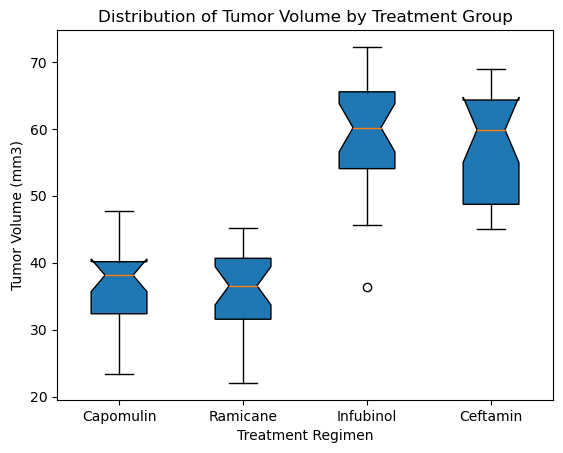

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

ax.set_title("Distribution of Tumor Volume by Treatment Group")
ax.set_xlabel("Treatment Regimen")
ax.set_ylabel("Tumor Volume (mm3)")

ax.boxplot(tumor_vol_data, labels=treatments, notch=True, patch_artist=True)

plt.show()

## Line and Scatter Plots

In [45]:
print(combined_data)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

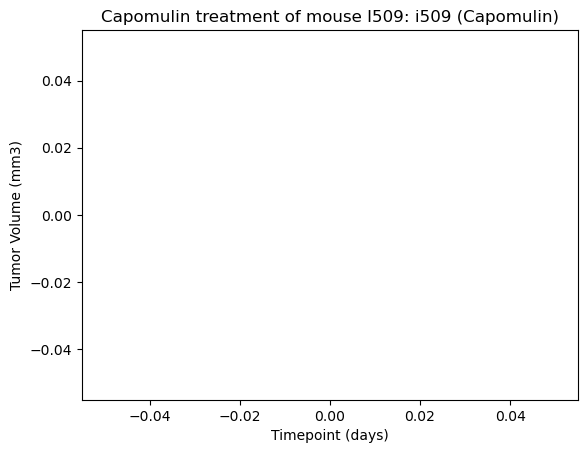

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select data for a single mouse treated with Capomulin
mouse_id = "i509"  
mouse_data = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == mouse_id), :]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o")

plt.title(f"Capomulin treatment of mouse I509: {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

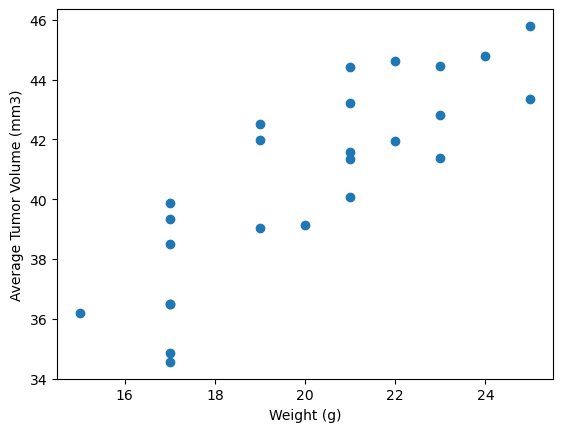

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


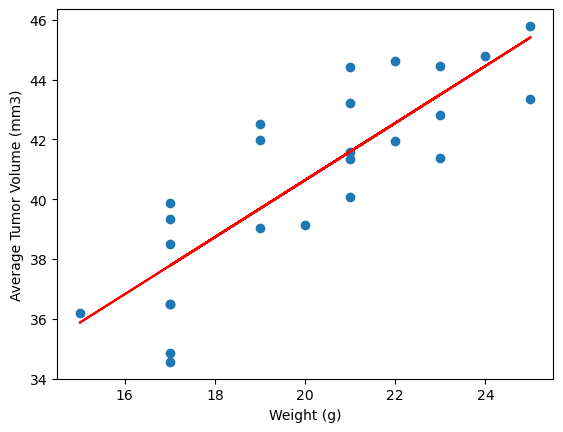

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
